# Fashion MNIST Classification

This is my first machine learning project where I build and train a neural network to classify images of clothing items from the Fashion MNIST dataset.

The goal is to demonstrate basic understanding of:
- loading and exploring a dataset,
- preprocessing and normalizing data,
- training a neural network using Keras,
- evaluating its performance,
- visualizing errors and interpreting results.

>Technologies used: Python, TensorFlow, keras, scikit-learn, Matolotlib

---

In [24]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Fashion MNIST

The **Fashion MNIST** dataset is a collection of 70,000 grayscale images of fashion products from 10 categories.  
Each image is 28x28 pixels, and each belongs to one of the following classes:

1. T-shirt/top  
2. Trouser  
3. Pullover  
4. Dress  
5. Coat  
6. Sandal  
7. Shirt  
8. Sneaker  
9. Bag  
10. Ankle boot

The dataset is split into:
- **60,000 training examples**
- **10,000 test examples**

In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

We also define readable class names for later visualization.

In [26]:
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

print(f"Training set shape: {train_images.shape}")
print(f"Test set shape: {test_images.shape}")

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


### Data Exploration & Visualization

Before training a model, it's important to understand the data visually.
Here, we display the first 10 images in the training set along with their labels.

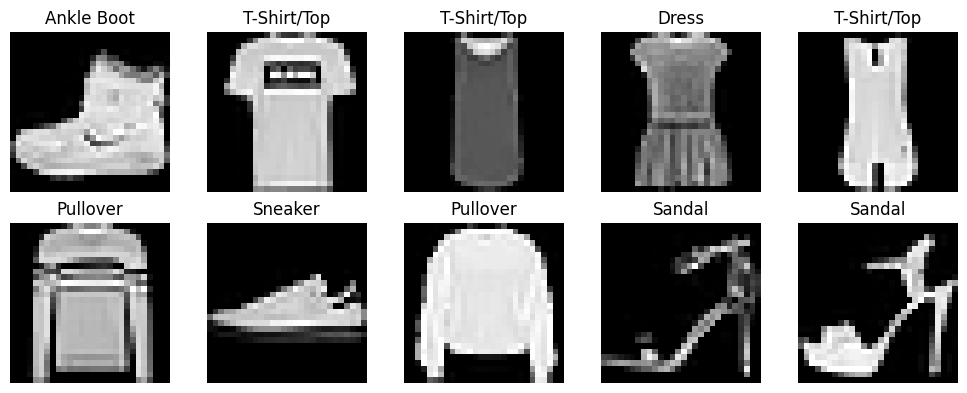

In [49]:
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_images[i], cmap="gray")
  plt.title(class_names[train_labels[i]])
  plt.axis("off")
plt.tight_layout()
plt.show()

### Data Preprocessing

Pixel values range from 0 to 255.  
We normalize them to the [0, 1] range so the model trains faster and better.

In [50]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model

We use a simple Sequential model:
- Flatten input image from 28x28 into a 784-length vector
- One hidden Dense layer with 128 neurons and ReLU activation
- Output layer with 10 neurons (one per class) and softmax activation

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 6. Compiling and Training the Model

We use:
- `Adam` optimizer (good default choice)
- `Sparse Categorical Crossentropy` as the loss function for multi-class classification
- `Accuracy` as the evaluation metric

We also use `validation_split=0.2` to monitor how well the model generalizes during training.

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7719 - loss: 0.6567 - val_accuracy: 0.8514 - val_loss: 0.4249
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.3933 - val_accuracy: 0.8505 - val_loss: 0.4122
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8705 - loss: 0.3583 - val_accuracy: 0.8743 - val_loss: 0.3467
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8839 - loss: 0.3215 - val_accuracy: 0.8742 - val_loss: 0.3501
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8913 - loss: 0.2993 - val_accuracy: 0.8687 - val_loss: 0.3597
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8951 - loss: 0.2808 - val_accuracy: 0.8800 - val_loss: 0.3322
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9011 - loss: 0.2705 - val_accuracy: 0.8785 - val_loss: 0.3477
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9012 - loss: 0.2640 -

### Visualizing Training History

Let's see how accuracy changed over time for both training and validation sets.



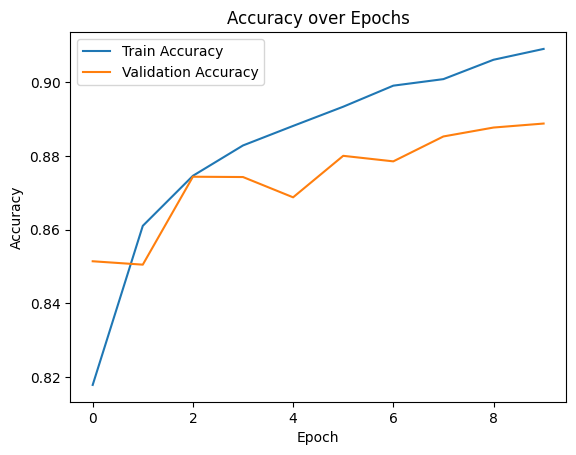

In [51]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Model Evaluation

After training, we evaluate the model on completely unseen data.

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.3394
Test Accuracy: 0.88


### Confusion Matrix

The confusion matrix gives insight into which classes are being confused the most.
This helps identify weaknesses in the model's predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


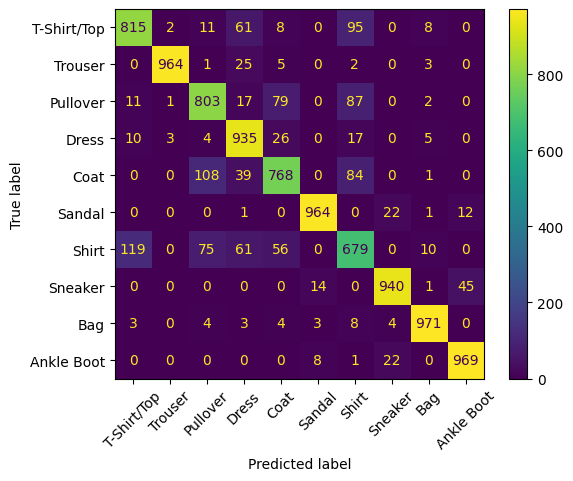

In [43]:
pred_probs = model.predict(test_images)
pred_labels = np.argmax(pred_probs, axis=1)

cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.show()

### Visualizing Misclassifications

We show a few examples where the model predicted incorrectly.  
This helps us understand which items are commonly misclassified and why.

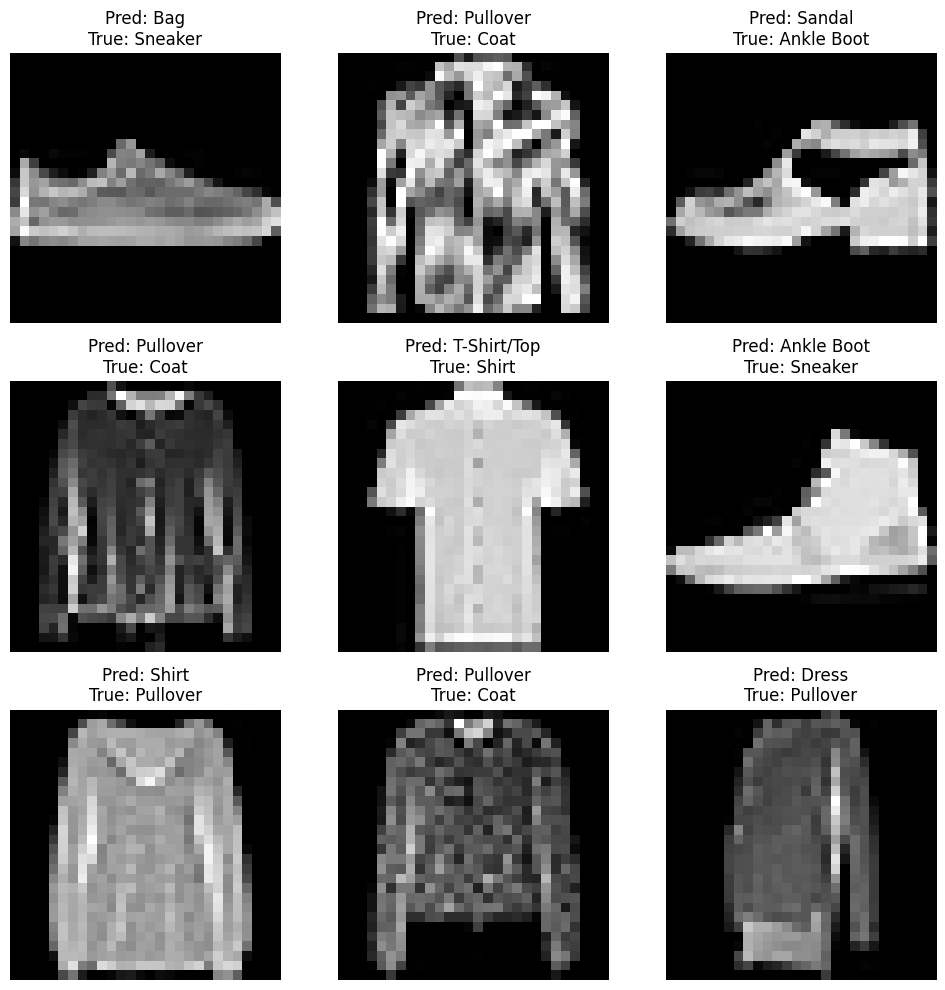

In [46]:
missclassified = np.where(pred_labels != test_labels)[0]

plt.figure(figsize=(10,10))
for i, idx in enumerate(missclassified[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_images[idx], cmap='gray')
  plt.title(f"Pred: {class_names[pred_labels[idx]]}\nTrue: {class_names[test_labels[idx]]}")
  plt.axis("off")
plt.tight_layout()
plt.show()

## Conclusion

This simple neural network achieved an accuracy of around 88% on the test set.  
Most confusion happened between visually similar classes such as *Shirt* vs *T-Shirt*.  
Using more advanced architectures like Convolutional Neural Networks (CNNs) could further improve the results.

### What I Learned
- Understanding dataset structure and normalization
- Training and evaluating a basic neural network
- Visualizing model performance
- The importance of error analysis in ML

This project marks the beginning of my journey in data science and machine learning 🚀